In [43]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta
from dateutil.relativedelta import relativedelta
import missingno
from functions import *

In [44]:
df = pd.read_csv('attacks.csv', encoding='unicode_escape')

<AxesSubplot:>

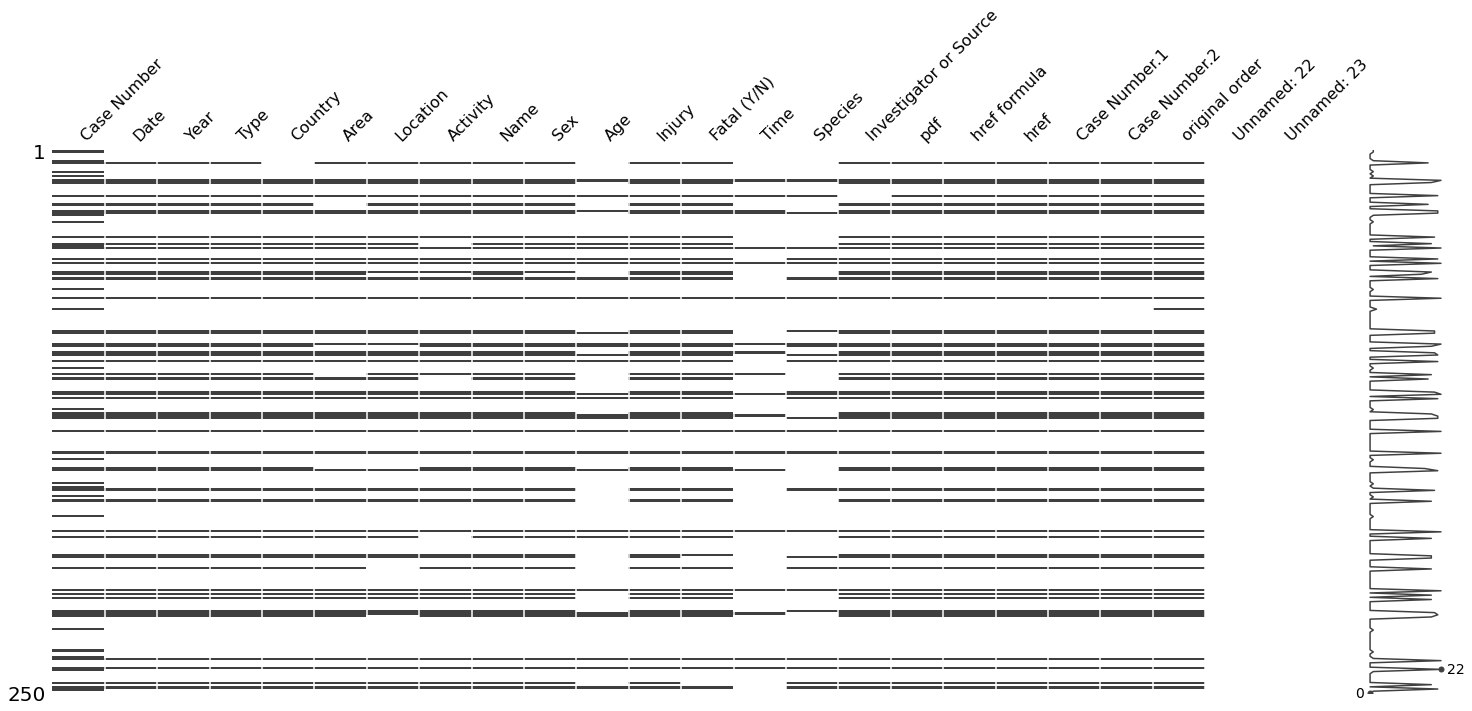

In [3]:
%matplotlib inline
missingno .matrix(df.sample(250))

In [4]:
# Una vez hemos creado el DataFrame, vamos a ver su contenido

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [236]:
df.shape

(25723, 24)

In [237]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [45]:
# Hay columnas que tienen los nombres con espacios
# Los eliminamos para que no den problemas más adelante
df = df.rename(columns={"Sex ": "Sex", "Species ": "Species"})

In [46]:
# Se calcula el % de nulos en cada columna
nulos_col_100(df)

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [47]:
# Se eliminan los duplicados de todas las columnas
df.drop_duplicates(subset=list(df.columns))

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Se comprueba que no hay duplicados
df.duplicated().value_counts()

True     19411
False     6312
dtype: int64

In [48]:
# Y también las filas en las que todos los elementos son nulos
df.dropna(axis=0, how='all',inplace=True)

In [243]:
# Se mira el contenido de las columnas Unnamed 22 y Unnamed 23
df['Unnamed: 22'].fillna(0, inplace=True)
df['Unnamed: 23'].fillna(0, inplace=True)

In [244]:
print("unnamed 22:", [x for x in df['Unnamed: 22'] if x!=0])
print("unnamed 23:", [y for y in df['Unnamed: 23'] if y!=0])

unnamed 22: ['stopped here']
unnamed 23: ['Teramo', 'change filename']


In [245]:
# La información que contienen no es relevante para nuestro estudio, por lo 
# que las borraremos

In [246]:
# Hay tres columnas con nombres parecidos (Case Number)
# Se mira si son lo mismo
df['Case Number.1'].equals(df['Case Number.2'].equals(df['Case Number']))

False

In [247]:
df['Case Number.1'].equals(df['Case Number.2'])

False

In [248]:
df['Case Number.1'].isin(df['Case Number.2']).value_counts()

True     8684
False      19
Name: Case Number.1, dtype: int64

In [249]:
df['Case Number'].equals(df['Case Number.1'])

False

In [250]:
df['Case Number'].isin(df['Case Number.1']).value_counts()

True     6279
False    2424
Name: Case Number, dtype: int64

In [251]:
# primer false: no son iguales las 3 columnas
# segundo false: 1 y 2 tampoco son iguales
# tercer false: 1 y 2 solo difieren en 19 valores, el resto son iguales
# borraremos 1 y 2

In [252]:
# Se hace lo mismo con href y href formula 
df['href formula'].isin(df['href']).value_counts()

True     8644
False      59
Name: href formula, dtype: int64

In [49]:
# Se eliminan del DataFrame las siguientes columnas en base a que:
# su contenido está duplicado o no nos interesa 
df = df.drop(['Unnamed: 22', 'Unnamed: 23','Case Number.1','Case Number.2','Time',
                  "href formula",'pdf','original order','Name','Investigator or Source','href'], axis=1)

<AxesSubplot:>

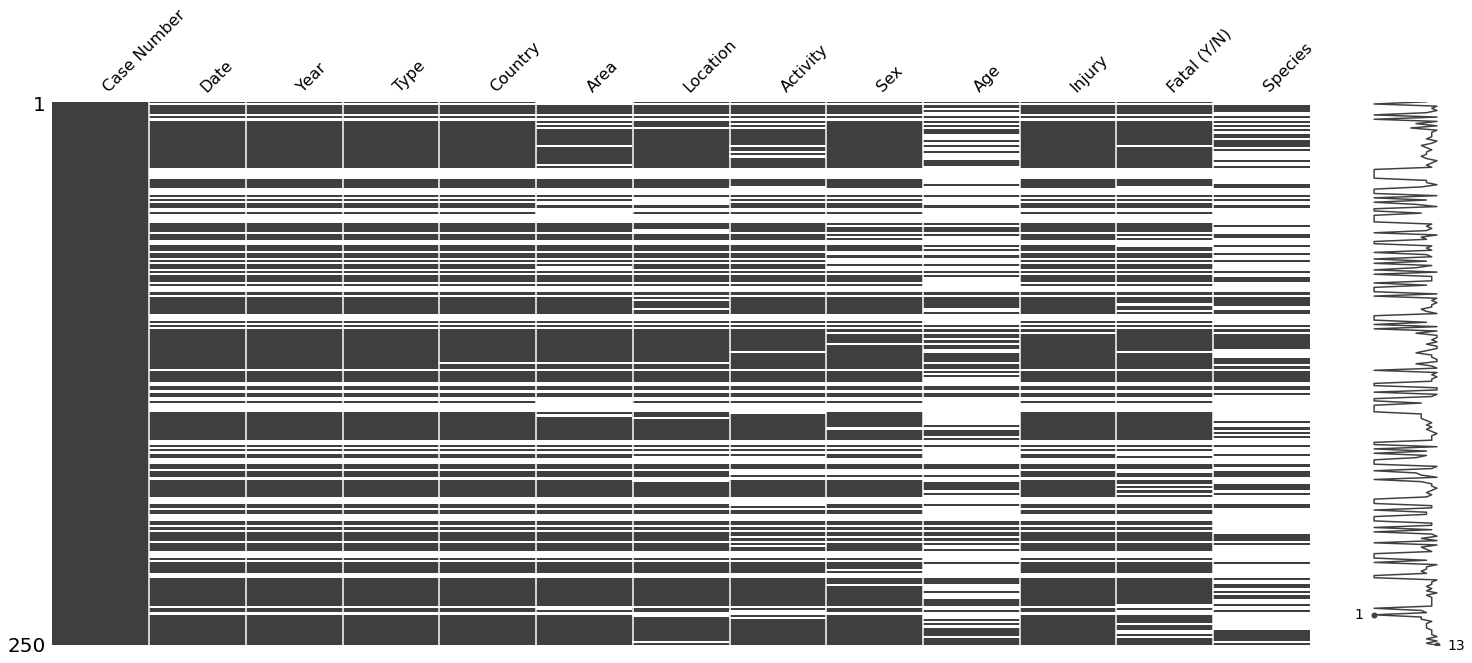

In [21]:
%matplotlib inline
missingno .matrix(df.sample(250))

<AxesSubplot:>

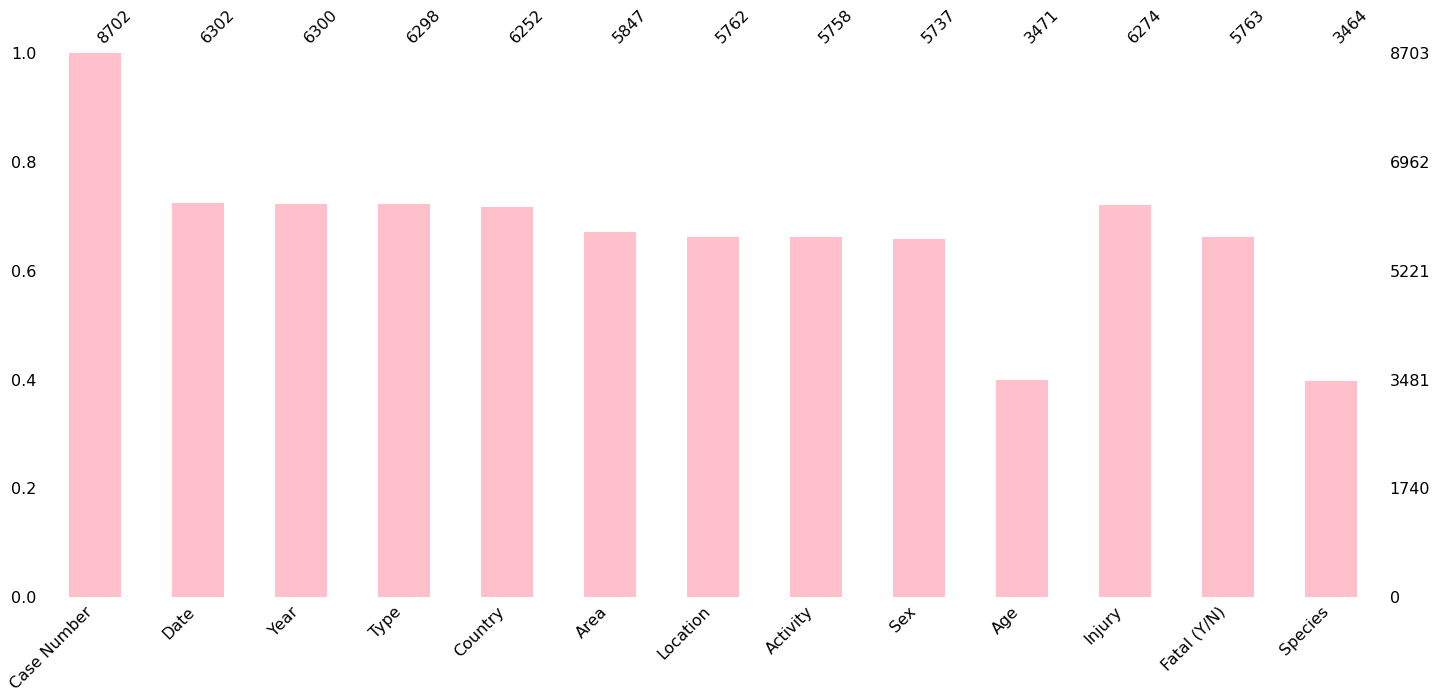

In [255]:
%matplotlib inline
missingno.bar(df, color='pink') #figsize=(10, 4)

<AxesSubplot:>

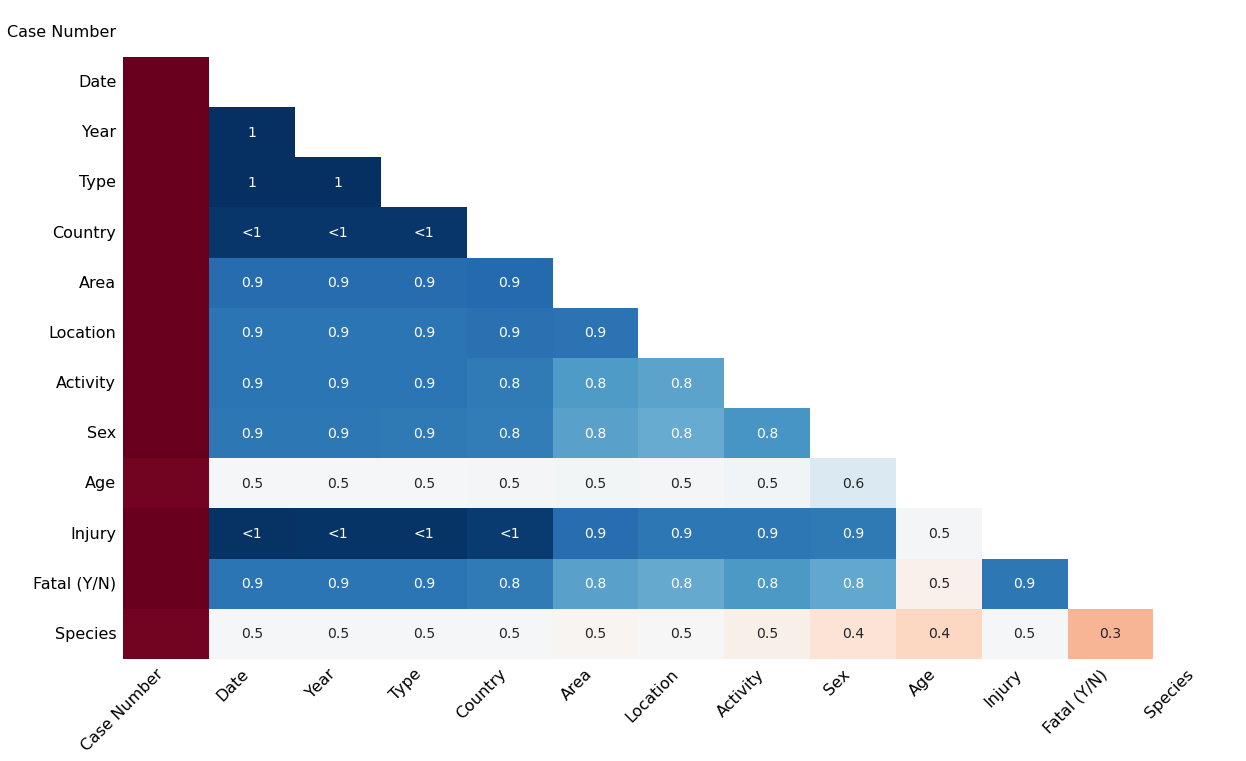

In [257]:
missingno.heatmap(df)

<AxesSubplot:>

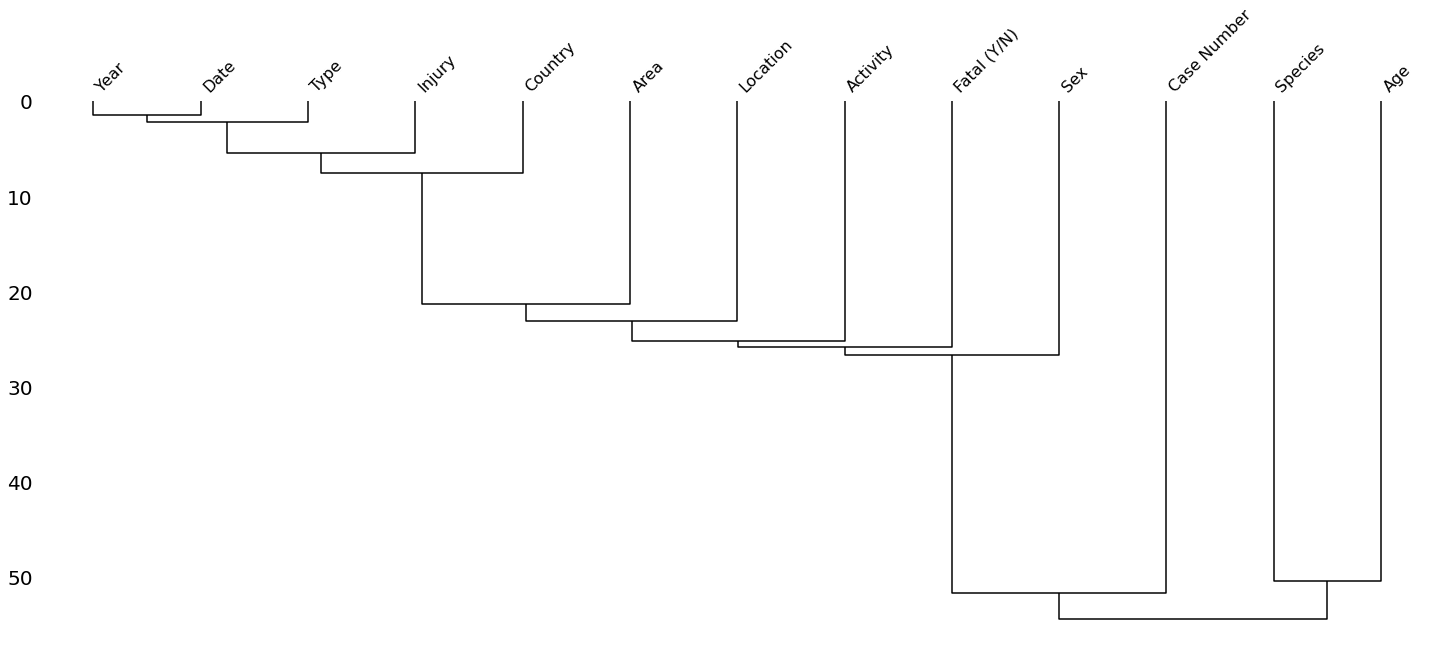

In [258]:
missingno.dendrogram(df)

In [22]:
# De esta manera podemos verlo numéricamente
df = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]
corr_mat = df.isnull().corr()

In [23]:
display(corr_mat)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
Case Number,1.000000,-0.006617,-0.006621,-0.006624,-0.006712,-0.007492,-0.007659,-0.007667,-0.007708,0.008731,-0.006670,-0.007657,0.008717
Date,-0.006617,1.000000,0.999425,0.998851,0.985813,0.883170,0.863965,0.863078,0.858447,0.502748,0.992008,0.864187,0.501905
Year,-0.006621,0.999425,1.000000,0.998276,0.985238,0.882583,0.863918,0.862488,0.857857,0.502512,0.991433,0.864140,0.501669
Type,-0.006624,0.998851,0.998276,1.000000,0.984662,0.883092,0.863329,0.861899,0.857267,0.502802,0.990858,0.863551,0.502483
Country,-0.006712,0.985813,0.985238,0.984662,1.000000,0.887719,0.870457,0.852283,0.846009,0.505288,0.978948,0.852318,0.502865
Area,-0.007492,0.883170,0.882583,0.883092,0.887719,1.000000,0.867023,0.782789,0.769104,0.510282,0.878283,0.769476,0.487811
Location,-0.007659,0.863965,0.863918,0.863329,0.870457,0.867023,1.000000,0.766403,0.751194,0.507492,0.859552,0.752181,0.493588
Activity,-0.007667,0.863078,0.862488,0.861899,0.852283,0.782789,0.766403,1.000000,0.793283,0.512082,0.861369,0.786152,0.467920
Sex,-0.007708,0.858447,0.857857,0.857267,0.846009,0.769104,0.751194,0.793283,1.000000,0.566835,0.857797,0.757070,0.426680
Age,0.008731,0.502748,0.502512,0.502802,0.505288,0.510282,0.507492,0.512082,0.566835,1.000000,0.504182,0.469133,0.389011


In [52]:
# Se limpia la columna Fatal (Y/N)
# para que todos los valores tengan el mismo formato
df['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [ ]:
df['Fatal (Y/N)'] = limpiar_fatal(df)

In [54]:
# Se revisan los datos '2017' y 'N' para ver si se pueden deducir
df.loc[786, 'Fatal (Y/N)'] = "N"

In [55]:
df['Fatal (Y/N)'].isnull().sum()

0

In [56]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(lambda x: "N" if x == "M" else x)
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(lambda x: "N" if x == "2017" else x)

In [57]:
df['Fatal (Y/N)'].replace(0, np.nan, inplace=True)

In [58]:
df["Fatal (Y/N)"].value_counts()

N          4303
Unknown    3011
Y          1389
Name: Fatal (Y/N), dtype: int64

In [59]:
# La columna Species no es relevante para nuestro estudio, por lo que
# sólo se pondrá Unknown en aquellas celdas que esten vacías
df.Species.unique()

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [60]:
df['Species'].fillna('Unknown', inplace=True)

In [62]:
# Se limpia la columna Type agrupando las categorías
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [63]:
df["Type"] = df["Type"].str.strip() 
df["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [272]:
# Vemos que hay datos que son lo mismo (boating,boat,boatomg)
# Invalid y Questionable se pondrán como NaN
df.country=limpiar_type(df)

In [65]:
df["Type"].value_counts()

Unprovoked    4834
Unknown       2954
Provoked       915
Name: Type, dtype: int64

In [67]:
# Se limpia la columna Sex
df["Sex"].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [68]:
# Hay duplicados y espacios entre las letras
df['Sex'].fillna('Unknown',inplace=True)

In [ ]:
df.country=limpiar_sex(df)

In [73]:
# Se mira a qué datos pertenece
df = df[(df['Sex'].notnull()) & (df['Sex'].apply(lambda val: all(val != s for s in ['F', 'M', 'M '])))]

In [74]:
# Mirando la información de las otras columnas no se puede deducir el género, por lo que se pondrá Unknown

In [75]:
df['Sex'].value_counts(dropna=False)

Unknown    2970
Name: Sex, dtype: int64

In [76]:
# Se limpia la columna Country
# Es una de las columnas que vamos a usar para estudiar, por lo que intentaremos deducir valores NaN mirando otras columnas
df['Country'].unique()

array(['NEW CALEDONIA', 'LIBYA', 'AUSTRALIA', 'COMOROS', 'USA', 'MEXICO',
       'ATLANTIC OCEAN', 'GREECE', 'SOUTH AFRICA', 'SPAIN', 'NEW ZEALAND',
       'CROATIA', 'UNITED KINGDOM', 'CUBA', 'SCOTLAND', 'SENEGAL',
       'TURKS & CAICOS', 'YEMEN', 'PHILIPPINES', 'GULF OF ADEN', 'BRAZIL',
       'EGYPT', 'INDONESIA', 'PAPUA NEW GUINEA', 'ITALY', 'CARIBBEAN SEA',
       'TANZANIA', 'REUNION', 'DOMINICAN REPUBLIC', 'HONG KONG',
       'VANUATU', 'JAPAN', 'EL SALVADOR', 'SOMALIA', 'TONGA',
       'SOLOMON ISLANDS', 'FRANCE', 'TUNISIA', 'BERMUDA', 'BANGLADESH',
       'MOZAMBIQUE', nan, 'BAHAMAS', 'MALAYSIA', 'THAILAND', 'COLUMBIA',
       'PANAMA', 'FIJI', 'JAMAICA', 'PERSIAN GULF', 'INDIA', 'AZORES',
       'NORTH ATLANTIC OCEAN', 'TURKEY', 'SAMOA', 'PACIFIC OCEAN',
       'MALTA', 'MID ATLANTIC OCEAN', 'INDIAN OCEAN', 'NEW GUINEA',
       'JAVA', 'NICARAGUA', 'PORTUGAL', 'SIERRA LEONE',
       'SOUTH ATLANTIC OCEAN', 'SLOVENIA', 'CANADA', 'ISRAEL', 'BARBADOS',
       'COSTA RICA', 'MAR

In [77]:
df['Country'].value_counts(dropna=False)

NaN                 2406
AUSTRALIA            142
USA                   99
SOUTH AFRICA          64
PAPUA NEW GUINEA      20
                    ... 
MALAYSIA               1
PANAMA                 1
PERSIAN GULF           1
MALTA                  1
SINGAPORE              1
Name: Country, Length: 83, dtype: int64

In [78]:
# Se pone todo en minúsculas para que sea más fácil trabajar con los nombres
df['Country']=df['Country'].str.lower()

In [ ]:
df.country=limpiar_country(df)

In [81]:
df['Country']=df['Country'].str.capitalize()

In [82]:
# Miramos donde hay un NaN en Country para ver si podemos deducir el país
# junto con Area y Location

df[(df.Country.isna()) & (df.Area.isna()== False) & (df.Location.isna()==False)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
3387,1970.08.02,02-Aug-1970,1970.0,Unknown,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,Unknown,NaN,"Sharks scavenged on bodies, but no record of t...",Unknown,Shark involvement prior to death was not confi...


In [83]:
# Es lo mismo pero más resumido con solo las tres col q nos interesan
df[(df.Country.isna()) & (df.Area.isna()== False) & (df.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis


In [86]:
# Pasamos los números de índice de referencia a una lista
df[(df.Country.isna()) & (df.Area.isna()== False) & (df.Location.isna()==False)].index
lista_indices = list(df[(df.Country.isna()) & (df.Area.isna()== False) & (df.Location.isna()==False)].index)

In [87]:
# Ahora hay que poner estos nuevos datos en la columna Country
lista_paises = ['Saint Kitts and Nevis',
                'Madagascar',
                'Cuba',
                'Saint Paul Island',
                'Saint Helena']

In [88]:
j = 0 #inicializo la variable j
for item in lista_indices:
    df.loc[item,'Country'] = lista_paises[j]
    j = j + 1

In [89]:
df.loc[3387,'Country'] = 'Australia'

In [90]:
df.dropna(how='all', subset=['Country','Area','Location'], inplace=True)

In [91]:
df.isna().sum()

Case Number      0
Date             0
Year             0
Type             0
Country          1
Area            60
Location        65
Activity       151
Sex              0
Age            527
Injury          14
Fatal (Y/N)      0
Species          0
dtype: int64

In [92]:
# Miramos los NaN solo en la columna country (hay 16) y que también
# tengan NaN en Area o Location
df[(df.Country.isna())]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
4018,1960.01.26,26-Jan-1960,1960.0,Unprovoked,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,Unknown,NaN,"As searchers approached wreckage, sharks circl...",N,Unknown


In [93]:
# Se introducen los nuevos datos que se han podido deducir 
df.loc[2956,'Country'] = 'Great Britain'
df.loc[3605,'Country'] = 'United States'
df.loc[4018,'Country'] = 'Australia'
df.loc[4231,'Country'] = 'Andaman and Nicobar Islands'
df.loc[4639,'Country'] = 'China'
df.loc[4700,'Country'] = 'Unknown'
df.loc[4712,'Country'] = 'Saint Thomas'
df.loc[5425,'Country'] = 'Unknown'
df.loc[5612,'Country'] = 'Unknown'
df.loc[5742,'Country'] = 'United States'
df.loc[5808,'Country'] = 'Unknown'
df.loc[5810,'Country'] = 'Santa Cruz de Tenerife'
df.loc[6155,'Country'] = 'Barbados'
df.loc[6175,'Country'] = 'Greece'
df.loc[6177,'Country'] = 'Greece'
df.loc[6206,'Country'] = 'India'

In [94]:
# Ya no hay nulos en Country
df.isna().sum()

Case Number     15
Date            15
Year            15
Type            15
Country          0
Area            75
Location        80
Activity       166
Sex             15
Age            542
Injury          29
Fatal (Y/N)     15
Species         15
dtype: int64

In [95]:
# Se limpia la columna Year
df.Year.unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991.,
       1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982.,
       1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973.,
       1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964.,
       1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955.,
       1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947., 1946.,
       1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938., 1937.,
       1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929., 1928.,
       1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920., 1913.,
       1911., 1910., 1909., 1908., 1905., 1900., 1899., 1897., 1895.,
       1893., 1892., 1891., 1890., 1889., 1888., 1887., 1886., 1885.,
       1881., 1880., 1879., 1877., 1875., 1874., 1872., 1868., 1867.,
       1865., 1862.,

In [96]:
df['Year'] = df['Year'].fillna(0).astype('int')

In [97]:
df.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996,
       1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985,
       1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963,
       1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952,
       1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1913,
       1911, 1910, 1909, 1908, 1905, 1900, 1899, 1897, 1895, 1893, 1892,
       1891, 1890, 1889, 1888, 1887, 1886, 1885, 1881, 1880, 1879, 1877,
       1875, 1874, 1872, 1868, 1867, 1865, 1862, 1847, 1842, 1840, 1836,
       1826, 1823, 1822, 1808, 1804, 1802, 1788, 1776, 1733, 1637, 1617,
          0])

In [98]:
df = df[df['Year'] > 1918]

In [99]:
df.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996,
       1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985,
       1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963,
       1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952,
       1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920])

In [100]:
# A partir de aquí centramos el estudio en los ataques que se han producido en Australia en los últimos 20 años

In [101]:
dfCopy = df.copy()

In [102]:
dfCopy = dfCopy[dfCopy['Country'] == 'Australia']

In [103]:
#dfCopy = dfCopy[dfCopy['Year'] > 1998]

In [104]:
dfCopy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
86,2017.09.14,Sep-2017,2017,Provoked,Australia,Westerm Australia,Esperance,Fishing,Unknown,NaN,"sharks rammed boats, no injury to occupants",N,"White shark, 3.5m"
218,2016.09.15.R,15-Sep-2016,2016,Provoked,Australia,Western Australia,Bunbury,Fishing,Unknown,NaN,Shark rammed boat. No injury to occupant,N,Unknown
326,2015.12.13,13-Dec-2015,2015,Provoked,Australia,New South Wales,Lake Macquarie,Fishing,Unknown,NaN,"No injury, shark rammed boat & bit motor",N,"White shark, 3.5 m"
463,2014.12.29.b,29-Dec-2014,2014,Unprovoked,Australia,New South Wales,Bherwerre Beach,Surfing,Unknown,NaN,Lacerations to both feet,N,2 m shark
753,2012.08.11,11-Aug-2012,2012,Provoked,Australia,Western Australia,Ocean Reef,Fishing,Unknown,NaN,"No injury, shark grabbed outboard motor",N,4.5 m shark


In [105]:
# Contar el número de ataques que se producen al año en los estados de Australia
dfCopy['Country']=dfCopy['Country'].str.lower()
dfCopy['Country']=dfCopy['Country'].str.capitalize()

In [ ]:
dfCopy.Area=limpiar_area(dfCopy)

In [107]:
dfCopy.Area.unique()

array(['Western Australia', 'New South Wales', 'Queensland', 'Tasmania',
       'South Australia', 'Victoria', nan, 'Caribbean Sea',
       'Northern Territory'], dtype=object)

In [108]:
dfCopy.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Species'],
      dtype='object')

In [311]:
#dfCopyAustralia = dfCopy.copy()

In [109]:
df_australia = dfCopy.groupby(['Year','Area'])[['Type']].count()
df_australia

,,Type
Year,Area,
1923,New South Wales,1
1925,Western Australia,1
1927,New South Wales,2
1929,Western Australia,1
1930,Victoria,1
...,...,...
2012,Western Australia,2
2014,New South Wales,1
2015,New South Wales,1


In [110]:
df_australia = df_australia.sort_values(['Year','Type'], ascending=[False,False])
df_australia

,,Type
Year,Area,
2017,Western Australia,1
2016,Western Australia,1
2015,New South Wales,1
2014,New South Wales,1
2012,Western Australia,2
...,...,...
1930,Victoria,1
1929,Western Australia,1
1927,New South Wales,2


In [112]:
df_australia.rename(columns={'Type':'Num Attacks'}, inplace=True)

In [113]:
display(df_australia)

,,Num Attacks
Year,Area,
2017,Western Australia,1
2016,Western Australia,1
2015,New South Wales,1
2014,New South Wales,1
2012,Western Australia,2
...,...,...
1930,Victoria,1
1929,Western Australia,1
1927,New South Wales,2


In [114]:
df_australia['Num Attacks'].sum()

125

<AxesSubplot:xlabel='Year,Area'>

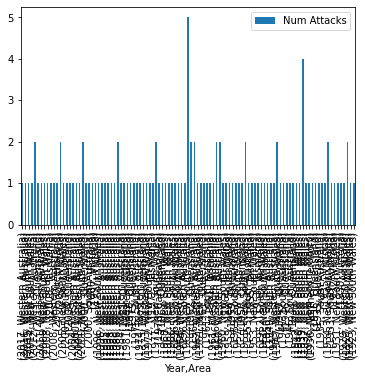

In [115]:
df_australia.plot.bar()

In [116]:
df_australia['Num Attacks'].unique()

array([1, 2, 5, 4], dtype=int64)

In [117]:
# La media de ataques en cada estado en este rango de años escogido
df_mean = df_australia.groupby('Area')[['Num Attacks']].mean()
df_mean_sorted = df_mean.sort_values(['Num Attacks'], ascending=[False]).head(10)

In [118]:
df_mean_sorted

,Num Attacks
Area,
New South Wales,1.419355
Victoria,1.166667
Western Australia,1.125000
South Australia,1.111111
Queensland,1.055556
Caribbean Sea,1.000000
Northern Territory,1.000000
Tasmania,1.000000


In [119]:
df_mean_sorted=df_mean_sorted.drop(df_mean_sorted.index[[5]])

In [120]:
df_mean_sorted

,Num Attacks
Area,
New South Wales,1.419355
Victoria,1.166667
Western Australia,1.125000
South Australia,1.111111
Queensland,1.055556
Northern Territory,1.000000
Tasmania,1.000000


<AxesSubplot:xlabel='Area'>

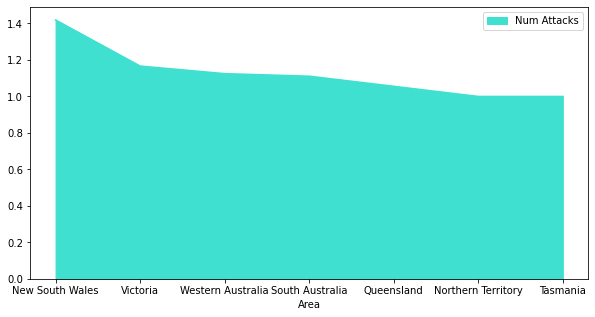

In [121]:
df_mean_sorted.plot.area(figsize=(10, 5),color='turquoise')

<AxesSubplot:ylabel='Area'>

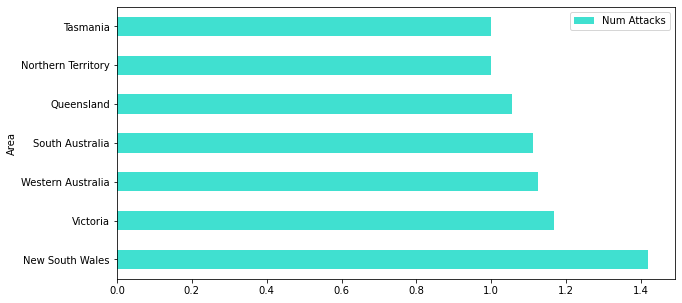

In [122]:
df_mean_sorted.plot.barh(figsize=(10, 5),color='turquoise')

#### Buscamos los datos demográficos en Wikipedia
linea de costa New South Wales 2007 km   9.62
linea de costa Victoria 1868 km   26.56
linea de costa Western Australia 12889 km   1.03
linea de costa South Australia 3816 km   1.74
linea de costa Queensland 6973 km   2.79
linea de costa Northen Territory 5437 km   0.17
linea de costa Tasmania 2833 km   7.58

In [127]:
df_mean_sorted.index.to_list()

['New South Wales',
 'Victoria',
 'Western Australia',
 'South Australia',
 'Queensland',
 'Northern Territory',
 'Tasmania']

In [124]:
linea_costa = [2007,1868,12889,3816,6973,5437,2833]

In [125]:
densidad_pb = [9.62,26.56,1.03,1.74,2.79,0.17,7.58]

In [128]:
df_pb = df_mean_sorted.assign(Population_density = [9.62,26.56,1.03,1.74,2.79,0.17,7.58])

In [129]:
display(df_pb)

,Num Attacks,Population_density
Area,,
New South Wales,1.419355,9.62
Victoria,1.166667,26.56
Western Australia,1.125000,1.03
South Australia,1.111111,1.74
Queensland,1.055556,2.79
Northern Territory,1.000000,0.17
Tasmania,1.000000,7.58


In [130]:
df_pb_costa = df_pb.assign(Coastline = [2007,1868,12889,3816,6973,5437,2833])

In [131]:
display(df_pb_costa)

,Num Attacks,Population_density,Coastline
Area,,,
New South Wales,1.419355,9.62,2007
Victoria,1.166667,26.56,1868
Western Australia,1.125000,1.03,12889
South Australia,1.111111,1.74,3816
Queensland,1.055556,2.79,6973
Northern Territory,1.000000,0.17,5437
Tasmania,1.000000,7.58,2833


In [132]:
# Si dividimos los quilómetros de costa que tiene cada estado entre el número de ataques
# podemos obtener una idea del ratio de ataques en esa costa

df_pb_costa['Ratio_attacks'] = df_pb_costa['Coastline']/df_pb_costa['Num Attacks']
df_pb_costa = df_pb_costa.sort_values(['Ratio_attacks'], ascending=[True])

In [133]:
display(df_pb_costa)

,Num Attacks,Population_density,Coastline,Ratio_attacks
Area,,,,
New South Wales,1.419355,9.62,2007,1414.022727
Victoria,1.166667,26.56,1868,1601.142857
Tasmania,1.000000,7.58,2833,2833.000000
South Australia,1.111111,1.74,3816,3434.400000
Northern Territory,1.000000,0.17,5437,5437.000000
Queensland,1.055556,2.79,6973,6606.000000
Western Australia,1.125000,1.03,12889,11456.888889


<AxesSubplot:xlabel='Area'>

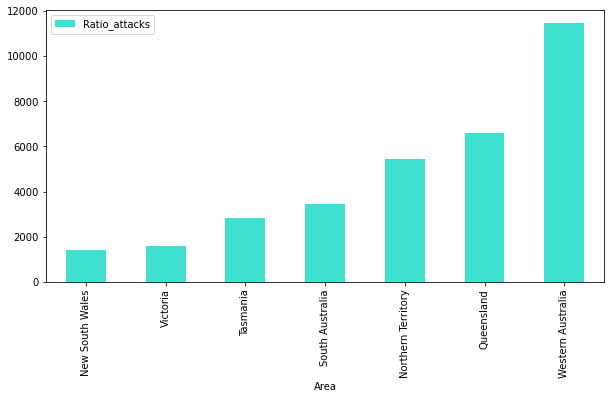

In [134]:
df_pb_costa.plot.bar(y="Ratio_attacks",figsize=(10, 5),color='turquoise')

In [135]:
# El que tiene ratio menor es New South Wales, que tuvo un ataque de tiburón por cada 1414 de costa en el período 1918-2018

In [136]:
# Se realiza a partir de aquí un estudio parecido pero en lugar de contabilizar los ataques de tiburón, 
# se va a contabilizar cuantas personas fueron atacadas
# Para ello se crea una nueva columna People

In [137]:
dfCopy2 = df.copy()

In [138]:
dfCopy2 = dfCopy2[dfCopy2['Country'] == 'Australia']
dfCopy2['Country']=dfCopy2['Country'].str.lower()
dfCopy2['Country']=dfCopy2['Country'].str.capitalize()

for fila in dfCopy2['Area']:
    if isinstance(fila, str):
        fila_nueva = re.sub('\/.+|\(.+\)|\.|\?', '', fila)
        fila_nueva = re.sub('\&', 'and', fila_nueva.strip())
        
        if fila_nueva == 'Victoria ':
            fila_nueva = fila_nueva.replace(fila_nueva, 'Victoria')
        elif fila_nueva == 'Torres Strait' or fila_nueva == 'Torres Strait ':
            fila_nueva = fila_nueva.replace(fila_nueva, 'Queensland')
        elif fila_nueva == 'Queensland ':
            fila_nueva = fila_nueva.replace(fila_nueva, 'Queensland')
        elif fila_nueva == 'Between Timor & Darwin, Australia':
            fila_nueva = fila_nueva.replace(fila_nueva, 'Northern Territory')
        elif fila_nueva == 'Westerm Australia':
            fila_nueva = fila_nueva.replace(fila_nueva, 'Western Australia')
        elif fila_nueva == 'Between Timor and Darwin, Australia':
            fila_nueva = fila_nueva.replace(fila_nueva, 'Western Australia')
        
        dfCopy2['Area'].replace(fila,fila_nueva, inplace=True)
    else:
        dfCopy2['Area'].replace(fila,np.nan, inplace=True)

In [139]:
dfCopy2['People'] = 1

In [140]:
dfCopy2.loc[3986,'People']=6
dfCopy2.loc[1743,'People']=2
dfCopy2.loc[4999,'People']=2
dfCopy2.loc[4801,'People']=2
dfCopy2.loc[4801,'People']=2
dfCopy2.loc[3517,'People']=2
dfCopy2.loc[5181,'People']=2
dfCopy2.loc[3459,'People']=2
dfCopy2.loc[2422,'People']=2
dfCopy2.loc[4035,'People']=2
dfCopy2.loc[1506,'People']=2
dfCopy2.loc[4078,'People']=2
dfCopy2.loc[3880,'People']=2
dfCopy2.loc[4118,'People']=2
dfCopy2.loc[2511,'People']=2
dfCopy2.loc[1508,'People']=3
dfCopy2.loc[698,'People']=2

In [141]:
dfCopy2.People.unique()

array([1., 2., 6., 3.])

In [142]:
df_columns = [col for col in dfCopy2.columns if col != 'People']
df_columns.insert(10, 'People')
dfCopy2 = dfCopy2[df_columns]

In [143]:
dfCopy2 = dfCopy2.groupby(['Year','Area'])[['People']].count()
dfCopy2 = dfCopy2.sort_values(['Year','People'], ascending=[False,False])

In [144]:
display(dfCopy2)

,,People
Year,Area,
2017.0,Western Australia,1
2016.0,Western Australia,1
2015.0,New South Wales,1
2014.0,New South Wales,1
2012.0,Western Australia,2
...,...,...
1930.0,Victoria,1
1929.0,Western Australia,1
1927.0,New South Wales,2


<AxesSubplot:xlabel='Year,Area'>

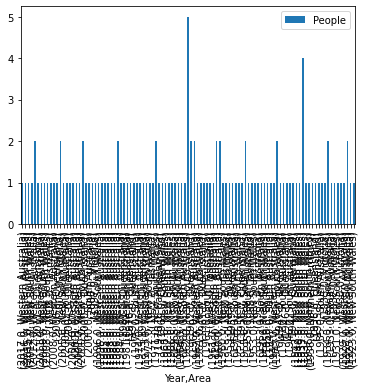

In [145]:
dfCopy2.plot.bar()

In [146]:
dfCopy2['People'].sum()

125

In [147]:
# La media de ataques en cada estado en este rango de años escogido
df_mean = dfCopy2.groupby('Area')[['People']].mean()
df_mean_sorted = df_mean.sort_values(['People'], ascending=[False]).head(10)

In [148]:
df_mean_sorted

,People
Area,
New South Wales,1.419355
Victoria,1.166667
Western Australia,1.125000
South Australia,1.111111
Queensland,1.055556
Caribbean Sea,1.000000
Northern Territory,1.000000
Tasmania,1.000000


In [149]:
df_mean_sorted=df_mean_sorted.drop(df_mean_sorted.index[[5]])

In [150]:
df_mean_sorted

,People
Area,
New South Wales,1.419355
Victoria,1.166667
Western Australia,1.125000
South Australia,1.111111
Queensland,1.055556
Northern Territory,1.000000
Tasmania,1.000000


<AxesSubplot:xlabel='Area'>

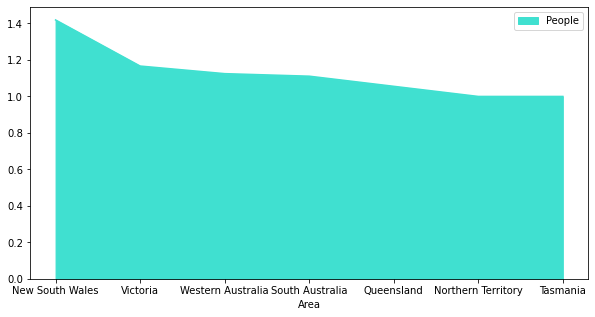

In [151]:
df_mean_sorted.plot.area(figsize=(10, 5),color='turquoise')

<AxesSubplot:ylabel='Area'>

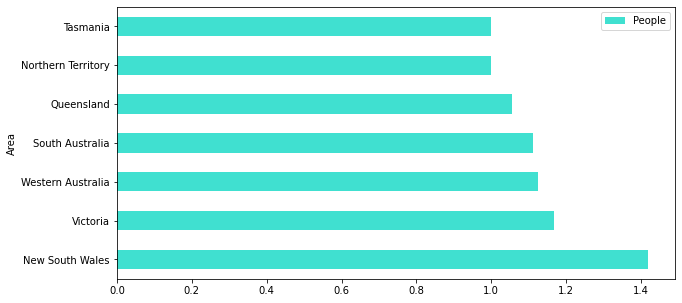

In [152]:
df_mean_sorted.plot.barh(figsize=(10, 5),color='turquoise')

In [153]:
df_mean_sorted.index.to_list()

['New South Wales',
 'Victoria',
 'Western Australia',
 'South Australia',
 'Queensland',
 'Northern Territory',
 'Tasmania']

In [356]:
df_mean_sorted=df_mean_sorted.drop(df_mean_sorted.index[5])

In [154]:
linea_costa = [2007,1868,12889,3816,6973,5437,2833]
densidad_pb = [9.62,26.56,1.03,1.74,2.79,0.17,7.58]

In [155]:
df_pb = df_mean_sorted.assign(Population_density = [9.62,26.56,1.03,1.74,2.79,0.17,7.58])

In [156]:
display(df_pb)

,People,Population_density
Area,,
New South Wales,1.419355,9.62
Victoria,1.166667,26.56
Western Australia,1.125000,1.03
South Australia,1.111111,1.74
Queensland,1.055556,2.79
Northern Territory,1.000000,0.17
Tasmania,1.000000,7.58


In [157]:
df_pb_costa = df_pb.assign(Coastline = [2007,1868,12889,3816,6973,5437,2833])

In [158]:
df_pb_costa

,People,Population_density,Coastline
Area,,,
New South Wales,1.419355,9.62,2007
Victoria,1.166667,26.56,1868
Western Australia,1.125000,1.03,12889
South Australia,1.111111,1.74,3816
Queensland,1.055556,2.79,6973
Northern Territory,1.000000,0.17,5437
Tasmania,1.000000,7.58,2833


In [159]:
# Si dividimos los quilómetros de costa que tiene cada estado entre el número de ataques
# podemos obtener una idea del ratio de ataques en esa costa

df_pb_costa['Ratio_victims'] = df_pb_costa['Coastline']/df_pb_costa['People']
df_pb_costa = df_pb_costa.sort_values(['Ratio_victims'], ascending=[True])
display(df_pb_costa)

,People,Population_density,Coastline,Ratio_victims
Area,,,,
New South Wales,1.419355,9.62,2007,1414.022727
Victoria,1.166667,26.56,1868,1601.142857
Tasmania,1.000000,7.58,2833,2833.000000
South Australia,1.111111,1.74,3816,3434.400000
Northern Territory,1.000000,0.17,5437,5437.000000
Queensland,1.055556,2.79,6973,6606.000000
Western Australia,1.125000,1.03,12889,11456.888889


In [160]:
# El que tiene ratio mayor es New South Wales, que tuvo un ataque de tiburón por cada 1414km de costa en el período 1918-2018

<AxesSubplot:xlabel='Area'>

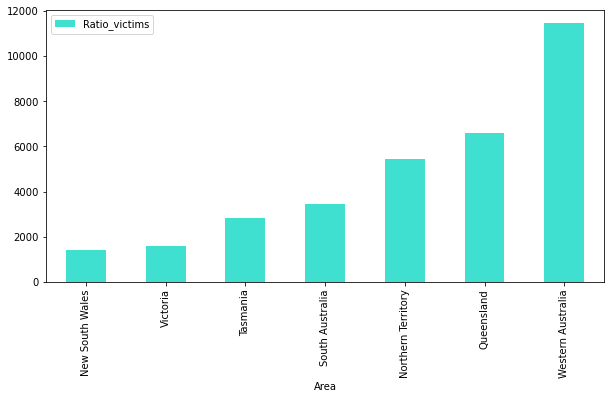

In [161]:
df_pb_costa.plot.bar(y="Ratio_victims",figsize=(10, 5),color='turquoise')

#### Conclusiones: da el mismo resultado para los dos periodos si estudiamos el ratio. Si nos fijamos en el número de víctimas cambia porque hay estados (por ejemplo Wstern Australia) que tienen una gran extensión de costa y por ende su kilometraje influye en el ratio estudiado.